In [109]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [110]:
# Import the dataset
dataset = pd.read_csv('fraudTrain.csv')

In [111]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [112]:
dataset.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [113]:
# 1296675 rows and 23 columns
dataset.shape

(1296675, 23)

In [114]:
# Describe the dataset
dataset.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [115]:
# Count no-frauds (0) and frauds (1)
occ = dataset['is_fraud'].value_counts()
occ

0    1289169
1       7506
Name: is_fraud, dtype: int64

In [116]:
# Group by category and calculate the mean
dataset.groupby(['category']).mean()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
category,,,,,,,,,,,
entertainment,648693.332567,4.112305e+17,64.210421,48815.004350,38.585850,-90.254521,88774.207416,1.349253e+09,38.584312,-90.255340,0.002478
food_dining,646558.494451,4.160529e+17,51.086905,48358.590252,38.496604,-90.000968,95179.357398,1.349181e+09,38.496378,-90.002212,0.001651
gas_transport,647985.024958,3.999135e+17,63.434572,48793.376579,38.801436,-90.333715,69020.300458,1.349236e+09,38.801539,-90.334948,0.004694
grocery_net,649772.871491,4.311998e+17,53.670084,48869.446119,38.203587,-90.000206,116659.287226,1.349297e+09,38.202452,-90.001726,0.002948
grocery_pos,648250.417436,4.300580e+17,116.960986,48690.789240,38.529579,-90.206699,86258.847660,1.349246e+09,38.527759,-90.206618,0.014098
health_fitness,648262.100362,4.127640e+17,54.182140,48999.719838,38.628414,-90.365731,84896.174315,1.349236e+09,38.630152,-90.363464,0.001549
home,648866.493230,4.234488e+17,58.270139,48777.598977,38.498473,-90.219430,86377.977631,1.349259e+09,38.497882,-90.220933,0.001608
kids_pets,648957.009723,4.140343e+17,57.536871,48804.369930,38.518723,-90.240678,87928.135949,1.349266e+09,38.520048,-90.238579,0.002114
misc_net,648638.143379,4.223779e+17,80.865095,49228.838134,38.622271,-90.450649,86120.638172,1.349258e+09,38.618617,-90.450118,0.014458


In [117]:
# Create a fraudulent and a non-fraudulent dataset
df_fraud = dataset[dataset.is_fraud == 1] 
df_non_fraud = dataset[dataset.is_fraud == 0]

In [118]:
# Count how many records are fraudulent and non-fraudulent
fraud_count = dataset_fraud['is_fraud'].sum()
non_fraud_count = dataset_non_fraud['is_fraud'].count() - fraud_count

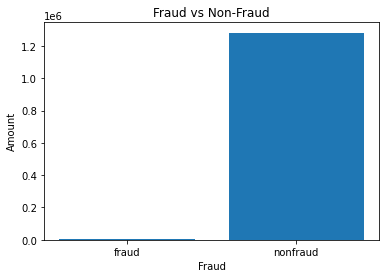

In [119]:
# Plot the count
plt.bar(['fraud', 'nonfraud'], [fraud_count, non_fraud_count])
plt.xlabel('Fraud')
plt.ylabel('Amount')
plt.title('Fraud vs Non-Fraud')
plt.show()

In [121]:
# Group by category and calculate the mean
dataset.groupby(['first']).mean()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
first,,,,,,,,,,,
Aaron,650358.429228,1.602294e+18,80.851949,44310.362284,40.329923,-86.199685,15503.110260,1.349310e+09,40.326088,-86.198535,0.006126
Adam,647974.066335,8.950304e+17,72.706821,41691.069382,38.770298,-89.412994,46985.093966,1.349237e+09,38.768076,-89.412688,0.006705
Adriana,651023.650438,3.565196e+15,78.869124,63565.000000,40.481500,-92.995100,3805.000000,1.349335e+09,40.501821,-93.014745,0.010711
Alan,647094.146879,1.414059e+15,63.628616,66581.811218,41.852582,-97.381676,160357.611742,1.349198e+09,41.860368,-97.376659,0.007857
Alex,646954.333333,4.728863e+15,83.960819,13529.400000,41.094809,-73.243325,798.580952,1.349210e+09,41.151045,-73.266271,0.019048
...,...,...,...,...,...,...,...,...,...,...,...
Whitney,679333.270805,4.260129e+12,73.716228,41812.000000,37.240900,-82.769600,230.000000,1.350295e+09,37.233120,-82.753339,0.012278
William,653008.387453,3.836116e+17,71.661266,49711.391607,36.125698,-88.439644,21452.054059,1.349407e+09,36.122978,-88.441984,0.005986
Willie,633657.473988,2.131205e+14,60.704075,71277.000000,32.955000,-92.587000,1758.000000,1.348699e+09,32.976425,-92.614793,0.003854


### Find a user with more than one record and a least one fraud to create the user interface
##### This will be used to create a login where the user can access the application (user interface) in order to control transitions.

In [145]:
# Join the "first" and "last" columns to create the "name" column
dataset["name"] = dataset["first"] + " " + dataset["last"]

In [161]:
# Find the duplicate names
duplicate_names = dataset['name'].duplicated()
print(duplicate_names)

0          False
1          False
2          False
3          False
4          False
           ...  
1296670     True
1296671     True
1296672     True
1296673     True
1296674     True
Name: name, Length: 1296675, dtype: bool


In [184]:
# Find the duplicate name with ID 1296671
display(dataset.iloc[1296671])

Unnamed: 0                                        1296671
trans_date_trans_time                 2020-06-21 12:12:19
cc_num                                   6011149206456997
merchant                         fraud_Abernathy and Sons
category                                      food_dining
amt                                                  51.7
first                                             Jeffrey
last                                                White
gender                                                  M
street                      8617 Holmes Terrace Suite 651
city                                            Tuscarora
state                                                  MD
zip                                                 21790
lat                                               39.2667
long                                             -77.5101
city_pop                                              100
job                      Production assistant, television
dob           

In [185]:
# Find how many records Jeffrey White have
jeffrey_white = dataset[dataset['name'] == 'Jeffrey White']
jeffrey_white_total = len(jeffrey_white)
print(jeffrey_white_total)

531


In [186]:
# Find how many frauds Jeffrey White have
jeffrey_white = dataset[(dataset['name'] == 'Jeffrey White') & (dataset['is_fraud'] == 1)]
jeffrey_white_fraud = len(jeffrey_white)

print(jeffrey_white_fraud)

8
